In [3]:
import numpy as np
import pandas as pd

#### What is the shape of "movies.csv"

In [4]:
movies = pd.read_csv("./movie_data/movies.csv")

In [5]:
movies.shape

(9742, 3)

In [6]:
ratings = pd.read_csv("./movie_data/ratings.csv")

#### What is the shape of "ratings.csv"?

In [7]:
ratings.shape

(100836, 4)

#### How many unique "userId" are available in "ratings.csv"

In [8]:
uniqueUserIds = ratings['userId'].unique()
len(uniqueUserIds)

610

In [9]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [10]:
links = pd.read_csv("./movie_data/links.csv")

In [11]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [12]:
tags =pd.read_csv("./movie_data/tags.csv")

In [13]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


#### Which movie has recieved maximum number of user ratings?

In [14]:
# Group by movieId and count the number of ratings for each movie
ratings_count = ratings.groupby('movieId')['userId'].count()

# Find the movieId with the maximum number of ratings
max_ratings_movie_id = ratings_count.idxmax()

max_ratings_movie_title = movies[movies['movieId'] == max_ratings_movie_id]['title'].values[0]

# Print the result
print(f'The movie with the maximum number of user ratings is: {max_ratings_movie_title}')


The movie with the maximum number of user ratings is: Forrest Gump (1994)


In [15]:
data = pd.concat([movies,ratings],axis=1)

In [16]:
data

,movieId,title,genres,userId,movieId,rating,timestamp
0,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,4.0,964982703
1,2.0,Jumanji (1995),Adventure|Children|Fantasy,1,3,4.0,964981247
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,6,4.0,964982224
3,4.0,Waiting to Exhale (1995),Comedy|Drama|Romance,1,47,5.0,964983815
4,5.0,Father of the Bride Part II (1995),Comedy,1,50,5.0,964982931
...,...,...,...,...,...,...,...
100831,NaN,NaN,NaN,610,166534,4.0,1493848402
100832,NaN,NaN,NaN,610,168248,5.0,1493850091
100833,NaN,NaN,NaN,610,168250,5.0,1494273047
100834,NaN,NaN,NaN,610,168252,5.0,1493846352


#### Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [17]:
matrix_movie_id = movies[movies['title'] == 'Matrix, The (1999)']['movieId'].values[0]

matrix_tags = tags[tags['movieId'] == matrix_movie_id]['tag']

print(f'Tags for "Matrix, The (1999)":')
for tag in matrix_tags:
    print(tag)


Tags for "Matrix, The (1999)":
martial arts
sci-fi
alternate universe
philosophy
post apocalyptic


#### What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [18]:
terminator_movie_id = movies[
    (movies['title'] == 'Terminator 2: Judgment Day (1991)')]['movieId'].values[0]

# Select ratings for "Terminator 2: Judgment Day (1991)" using the movieId
terminator_ratings = ratings[ratings['movieId'] == terminator_movie_id]['rating']

# Calculate the average rating
average_rating = terminator_ratings.mean()

# Print the result
print(f'The average user rating for "Terminator 2: Judgment Day (1991)" is: {average_rating:.2f}')


The average user rating for "Terminator 2: Judgment Day (1991)" is: 3.97


#### How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

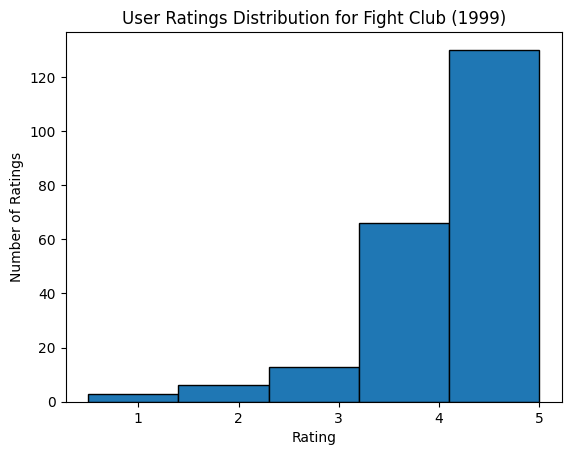

In [19]:
import matplotlib.pyplot as plt

# Find the movieId for "Fight Club (1999)"
fight_club_movie_id = movies[
    (movies['title'] == 'Fight Club (1999)')]['movieId'].values[0]

# Select ratings for "Fight Club (1999)" using the movieId
fight_club_ratings = ratings[ratings['movieId'] == fight_club_movie_id]['rating']

# Plot the data distribution using a histogram
plt.hist(fight_club_ratings, bins=5, edgecolor='black')  # Adjust the number of bins as needed
plt.title('User Ratings Distribution for Fight Club (1999)')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()

#### Left Skewed Distribution (Negatively Skewed): If the histogram is stretched out to the left and most of the data points are on the right, it's left-skewed. This suggests that there are more higher ratings, and few lower ratings.

#### Which movie is the most popular based on average user ratings?

In [20]:
# Calculate the average rating for each movie
average_ratings = ratings.groupby('movieId')['rating'].mean()

# Find the movieId with the highest average rating
most_popular_movie_id = average_ratings.idxmax()

# Get the title of the most popular movie
most_popular_movie_title = movies[movies['movieId'] == most_popular_movie_id]['title'].values[0]

# Print the result
print(f'The most popular movie based on average user ratings is: {most_popular_movie_title}')

The most popular movie based on average user ratings is: Lamerica (1994)


In [21]:
imdb = pd.concat([movies,tags],axis=1)
imdb

,movieId,title,genres,userId,movieId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.0,60756.0,funny,1.445715e+09
1,2,Jumanji (1995),Adventure|Children|Fantasy,2.0,60756.0,Highly quotable,1.445715e+09
2,3,Grumpier Old Men (1995),Comedy|Romance,2.0,60756.0,will ferrell,1.445715e+09
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.0,89774.0,Boxing story,1.445715e+09
4,5,Father of the Bride Part II (1995),Comedy,2.0,89774.0,MMA,1.445715e+09
...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,NaN,NaN,NaN,NaN
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,NaN,NaN,NaN,NaN
9739,193585,Flint (2017),Drama,NaN,NaN,NaN,NaN
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,NaN,NaN,NaN,NaN


In [22]:
# Group ratings based on movieId and calculate count and mean
ratings_grouped = ratings.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

# Inner join the grouped ratings DataFrame with movies DataFrame on movieId
merged_df = pd.merge(ratings_grouped, movies, on='movieId', how='inner')

# Filter movies with more than 50 user ratings
popular_movies = merged_df[merged_df['count'] > 50]

# Sort the DataFrame by average rating in descending order to find the most popular movie
most_popular_movie = popular_movies.sort_values(by='mean', ascending=False).iloc[0]

# Print the result
print(f"The most popular movie based on average user ratings with more than 50 ratings is:")
print(f"Title: {most_popular_movie['title']}")
print(f"Average Rating: {most_popular_movie['mean']:.2f}")
print(f"Number of Ratings: {most_popular_movie['count']}")


The most popular movie based on average user ratings with more than 50 ratings is:
Title: Shawshank Redemption, The (1994)
Average Rating: 4.43
Number of Ratings: 317


#### Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [23]:
# Group ratings based on movieId and calculate count
ratings_count = ratings.groupby('movieId')['rating'].count().reset_index()

# Merge the DataFrame with movies
merged_df = pd.merge(ratings_count, movies, on='movieId', how='inner')

# Sort the DataFrame by rating count in descending order to find the top 5 popular movies
top_5_popular_movies = merged_df.sort_values(by='rating', ascending=False).head(5)

# Print the result
print("Top 5 popular movies based on number of user ratings:")
for index, row in top_5_popular_movies.iterrows():
    print(f"Title: {row['title']}")
    print(f"Number of Ratings: {row['rating']}")
    print("------------------------")

Top 5 popular movies based on number of user ratings:
Title: Forrest Gump (1994)
Number of Ratings: 329
------------------------
Title: Shawshank Redemption, The (1994)
Number of Ratings: 317
------------------------
Title: Pulp Fiction (1994)
Number of Ratings: 307
------------------------
Title: Silence of the Lambs, The (1991)
Number of Ratings: 279
------------------------
Title: Matrix, The (1999)
Number of Ratings: 278
------------------------


#### Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [24]:
sci_fi_movies = movies[movies['genres'].str.contains('Sci-Fi')]

# Group ratings based on movieId and calculate count of ratings
ratings_count = ratings.groupby('movieId')['rating'].count().reset_index()

# Merge the two DataFrames
merged_df = pd.merge(ratings_count, sci_fi_movies, on='movieId', how='inner')

# Sort the DataFrame based on the count of ratings
third_most_popular_sci_fi_movie = merged_df.sort_values(by='rating', ascending=False).iloc[2]

# Print the result
print(f"The third most popular Sci-Fi movie based on number of user ratings is:")
print(f"Title: {third_most_popular_sci_fi_movie['title']}")
print(f"Number of Ratings: {third_most_popular_sci_fi_movie['rating']}")

The third most popular Sci-Fi movie based on number of user ratings is:
Title: Jurassic Park (1993)
Number of Ratings: 238


#### Mention the movieId of the movie which has the highest IMDB rating

In [25]:
import pandas as pd
movies_df = pd.DataFrame(links)
highest_rated_movie = movies_df.loc[movies_df['imdbId'].idxmax()]

highest_rated_movie_id = highest_rated_movie['movieId']

print(f"The movieId of the highest-rated movie is: {highest_rated_movie_id}")

The movieId of the highest-rated movie is: 193587.0


#### Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating

In [26]:
import pandas as pd
movies_df = pd.DataFrame(imdb)
scifi_movies = movies_df[movies_df['genres'].str.contains('Sci-Fi')]
highest_rated_scifi_movie = scifi_movies.loc[scifi_movies['movieId'].idxmax()]
highest_rated_scifi_movie_id = highest_rated_scifi_movie['movieId']
print(f"The movieId of the highest-rated Sci-Fi movie is: {highest_rated_scifi_movie_id}")

The movieId of the highest-rated Sci-Fi movie is:       movieId   movieId
9732   193565       NaN
3311     4480  176371.0
